# 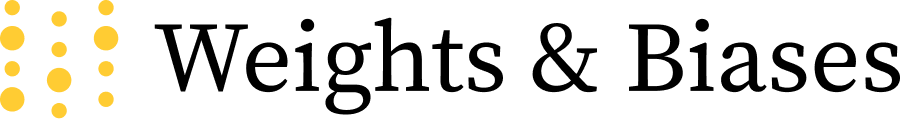

# Introduction to Weights and Biases (WandB)

## What is WandB?

Weights and Biases (WandB) is a popular tool for tracking and visualizing machine learning experiments. It is designed to help researchers and developers manage and optimize their machine learning models by providing a comprehensive suite of features for logging, visualization, and collaboration.

## Key Features of WandB

1. **Experiment Tracking**: 
   - WandB allows you to log metrics such as loss, accuracy, and other custom metrics in real-time. 
   - You can visualize these metrics to monitor the performance of your models during training and evaluation.

2. **Hyperparameter Tuning**:
   - WandB Sweeps makes it easy to perform hyperparameter optimization. 
   - You can define a search space for hyperparameters and run multiple experiments to find the best configuration.

3. **Model Versioning**:
   - Save and version your models directly in WandB.
   - Keep track of different versions and easily compare their performance.

4. **Collaborative Reports**:
   - Create interactive reports to share your findings with colleagues.
   - Collaborate on experiments and share results with your team seamlessly.

5. **Integrations**:
   - WandB integrates with many popular machine learning frameworks such as TensorFlow, PyTorch, Keras, and more.
   - This allows for easy integration into your existing workflows.

## Why Use WandB?

Using WandB can significantly enhance your workflow by providing tools to systematically track and optimize your machine learning experiments. It ensures reproducibility, facilitates collaboration, and offers deep insights into model performance, making it an invaluable tool for any machine learning project.

In this Jupyter Notebook, we will explore WandB's features through a series of examples, starting from basic logging to advanced hyperparameter tuning. We will cover:

1. Basic setup and logging of metrics.
2. Visualization of training metrics.
3. Intermediate features like custom charts and visualizations.
4. Advanced features including hyperparameter sweeps.
5. A case study demonstrating WandB's application in a real-world scenario.

Let's get started!


In [1]:
# Install required packages
!pip install wandb --upgrade

import sys
sys.path.insert(0,'/home/jovyan/.local/geoai-py3-0.9.5/bin')

# Check versions
print(f"WandB version: {wandb.__version__}")

Defaulting to user installation because normal site-packages is not writeable


NameError: name 'tf' is not defined

In [7]:
import wandb
import matplotlib.pyplot as plt
import random
import numpy as np
# Login to WandB account
wandb.login()

True

# 1. Getting Started with WandB


In this section, we introduce Weights and Biases (WandB), a tool for tracking and visualizing machine learning experiments. We demonstrate the basic setup for initializing a WandB run and logging some simple metrics like accuracy and loss over several epochs. 

In [8]:
epochs = 10
lr = 0.01

# Initialize a new run
wandb.init(project='cybergis-demo-1', 
            name='basic-example',
            # Track hyperparameters and run metadata
            config={
                "learning_rate": lr,
                "epochs": epochs,
            })

offset = random.random() / 5
print(f"lr: {lr}")

# simulating a training run
for epoch in range(2, epochs):
    acc = 1 - 2**-epoch - random.random() / epoch - offset
    loss = 2**-epoch + random.random() / epoch + offset
    print(f"epoch={epoch}/{epochs}: accuracy={acc}, loss={loss}")
    wandb.log({"accuracy": acc, "loss": loss})
    
# Finish the run
wandb.finish()

lr: 0.01
epoch=2/10: accuracy=0.19127474063781513, loss=0.4407422071438835
epoch=3/10: accuracy=0.5661598022933538, loss=0.5912987315744431
epoch=4/10: accuracy=0.6822232169025411, loss=0.3459740290011879
epoch=5/10: accuracy=0.6707936338482685, loss=0.2588744775911019
epoch=6/10: accuracy=0.7003866641197898, loss=0.20149739754265583
epoch=7/10: accuracy=0.8341776553632843, loss=0.16416727113425586
epoch=8/10: accuracy=0.7381881265934085, loss=0.18050497488984155
epoch=9/10: accuracy=0.8112102106772097, loss=0.22357087051606817


accuracy,▁▅▆▆▇█▇█
loss,▆█▄▃▂▁▁▂
accuracy,0.81121
loss,0.22357


# 2. Visualization with WandB
In this section, we dive deeper into using WandB by logging metrics in more detail and visualizing these metrics using custom plots.
This example demonstrates how to track the progress of machine learning models and visualize the accuracy over epochs using WandB's logging and charting capabilities.

In [9]:
# Initialize a new run
wandb.init(project='cybergis-demo-2', name='intermediate-example')

# Log metrics with charts
for epoch in range(1, 6):
    accuracy = np.random.rand()
    loss = np.random.rand()
    wandb.log({'epoch': epoch, 'accuracy': accuracy, 'loss': loss})
    # Custom plot: Accuracy vs Epoch
    plt.plot(epoch, accuracy, 'bo')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.savefig('accuracy_vs_epoch.png')
    wandb.log({"Accuracy Plot": wandb.Image('accuracy_vs_epoch.png')})
    plt.close()
    
# Finish the run
wandb.finish()

accuracy,▄█▁▂▂
epoch,▁▃▅▆█
loss,▃▁▇▃█
accuracy,0.31379
epoch,5
loss,0.69848


# 3. Advanced Features - Hyperparameters Tuning 
In this section, we explore advanced features of WandB, such as hyperparameter tuning using WandB Sweeps. We set up a sweep configuration to randomly search through a set of hyperparameters and demonstrate how to run the sweep and log the results. This example highlights how to automate and optimize the hyperparameter tuning process.   

In [10]:
# Import the necessary libraries
import wandb
import numpy as np
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define the sweep configuration
sweep_config = {
    'method': 'random',
    'metric': {
        'name': 'accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'n_estimators': {
            'values':[10, 50, 100, 200]
        },
        'max_depth': {
            'values': [5, 10, 20, None]
        },
        'min_samples_split': {
            'values': [2, 5, 10]
        }
    }
}

In [13]:
# Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project='cybergis-demo-3')

def main(config=None):
    with wandb.init(config=config):
        config = wandb.config
        
        # Initialize and train the Random Forest model
        model = RandomForestClassifier(
            n_estimators=config.n_estimators,
            max_depth=config.max_depth,
            min_samples_split=config.min_samples_split,
            random_state=42
        )
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Log metrics to wandb
        wandb.log({
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

if __name__ == "__main__":
    wandb.agent(sweep_id, function=main, count=50)

Create sweep with ID: 3yh5kqyi
Sweep URL: https://wandb.ai/9bombs/cybergis-demo-3/sweeps/3yh5kqyi


wandb: Agent Starting Run: usvplq0h with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95099
precision,0.95121
recall,0.95088


wandb: Agent Starting Run: rg8ko3je with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95099
precision,0.95121
recall,0.95088


wandb: Agent Starting Run: v4u4c9kj with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: xgxsp1bf with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95789
f1_score,0.95799
precision,0.9582
recall,0.95789


wandb: Agent Starting Run: ywhvjdh2 with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: bp6jk5ee with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.9614
f1_score,0.96145
precision,0.96152
recall,0.9614


wandb: Agent Starting Run: q9cs5655 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94386
f1_score,0.94399
precision,0.94423
recall,0.94386


wandb: Agent Starting Run: a9hz77ta with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: 3i1z3q7g with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95075
precision,0.95074
recall,0.95088


wandb: Agent Starting Run: hwgmlpua with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95075
precision,0.95074
recall,0.95088


wandb: Agent Starting Run: yyn3urw9 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95099
precision,0.95121
recall,0.95088


wandb: Agent Starting Run: 9ief4jzz with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: lrirhs95 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95433
precision,0.9543
recall,0.95439


wandb: Agent Starting Run: 5s3k2zoc with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95099
precision,0.95121
recall,0.95088


wandb: Agent Starting Run: no15w5n0 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: n2jw32jr with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.93333
f1_score,0.93409
precision,0.93777
recall,0.93333


wandb: Agent Starting Run: brmov1b4 with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94737
f1_score,0.94743
precision,0.94752
recall,0.94737


wandb: Agent Starting Run: ddlimjql with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95075
precision,0.95074
recall,0.95088


wandb: Agent Starting Run: 4i62y1sc with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94737
f1_score,0.94787
precision,0.95038
recall,0.94737


wandb: Agent Starting Run: rpplotjf with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95099
precision,0.95121
recall,0.95088


wandb: Agent Starting Run: 1mzegygy with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94737
f1_score,0.94743
precision,0.94752
recall,0.94737


wandb: Agent Starting Run: q7fp2pn3 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95789
f1_score,0.95799
precision,0.9582
recall,0.95789


wandb: Agent Starting Run: roaex70i with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.93333
f1_score,0.93409
precision,0.93777
recall,0.93333


wandb: Agent Starting Run: cblkuxl3 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95433
precision,0.9543
recall,0.95439


wandb: Agent Starting Run: xuj0q6w0 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: ulspkwpn with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94737
f1_score,0.94743
precision,0.94752
recall,0.94737


wandb: Agent Starting Run: 4ykf0u5q with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95789
f1_score,0.95799
precision,0.9582
recall,0.95789


wandb: Agent Starting Run: p748cfo5 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94737
f1_score,0.94787
precision,0.95038
recall,0.94737


wandb: Agent Starting Run: dhc56dxx with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: t05v4m80 with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94035
f1_score,0.94069
precision,0.94165
recall,0.94035


wandb: Agent Starting Run: cor1hjsb with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.93333
f1_score,0.93409
precision,0.93777
recall,0.93333


wandb: Agent Starting Run: d6aca00l with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95789
f1_score,0.95789
precision,0.95789
recall,0.95789


wandb: Agent Starting Run: 8sfnybhw with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: brw4e0dp with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95433
precision,0.9543
recall,0.95439


wandb: Agent Starting Run: 88k5tcor with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95088
precision,0.95088
recall,0.95088


wandb: Agent Starting Run: xmxq7nuy with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.93333
f1_score,0.93409
precision,0.93777
recall,0.93333


wandb: Agent Starting Run: 2wy10zzg with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: tnyhb5zd with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94035
f1_score,0.94069
precision,0.94165
recall,0.94035


wandb: Agent Starting Run: 79qileuc with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: 8anxtai7 with config:
wandb: 	max_depth: 20
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: rrcpm53l with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95099
precision,0.95121
recall,0.95088


wandb: Agent Starting Run: g30fy6ie with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95088
precision,0.95088
recall,0.95088


wandb: Agent Starting Run: kookndnq with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.93333
f1_score,0.93409
precision,0.93777
recall,0.93333


wandb: Agent Starting Run: gmakmfjq with config:
wandb: 	max_depth: 10
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94386
f1_score,0.94399
precision,0.94423
recall,0.94386


wandb: Agent Starting Run: pj8elcz7 with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94386
f1_score,0.94399
precision,0.94423
recall,0.94386


wandb: Agent Starting Run: o00t2t96 with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 10
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95439
f1_score,0.95444
precision,0.95452
recall,0.95439


wandb: Agent Starting Run: wto2ezlt with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 10
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.93333
f1_score,0.93409
precision,0.93777
recall,0.93333


wandb: Agent Starting Run: j604bnx6 with config:
wandb: 	max_depth: None
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 50
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95789
f1_score,0.95799
precision,0.9582
recall,0.95789


wandb: Agent Starting Run: i3cik81w with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 100
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.95088
f1_score,0.95088
precision,0.95088
recall,0.95088


wandb: Agent Starting Run: vthqprbq with config:
wandb: 	max_depth: 5
wandb: 	min_samples_split: 5
wandb: 	n_estimators: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,0.94737
f1_score,0.94717
precision,0.9472
recall,0.94737


# Use Case: MNIST Classification

In this section, we will demonstrate how to use Weights & Biases (WandB) to track and visualize the training process of a neural network on the MNIST dataset. The MNIST dataset is a collection of 70,000 handwritten digits commonly used for training various image processing systems. Our goal is to build a simple neural network model to classify these digits and use WandB to log important metrics and visualizations.   
   
WandB can be integrated to many frameworks such as Tensorflow and Pytorch. For more information, check out the document for [here](https://docs.wandb.ai/guides/integrations). In this case, we are using **keras** for tensorflow.

## Load libraries

In [14]:
import wandb
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from wandb.integration.keras import WandbMetricsLogger

2024-05-30 03:38:31.101254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 03:38:35.356228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load sample data

In [15]:
# Load and preprocess the MNIST dataset
# The MNIST dataset is split into training and testing sets, and the pixel values are normalized to the range [0, 1]
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

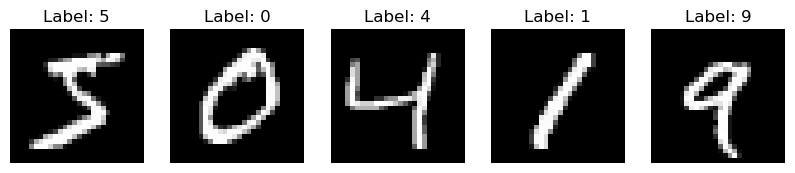

In [16]:
# Visualize the first 5 images with labels
def visualize_mnist_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Call the function to visualize the first 5 images
visualize_mnist_images(x_train, y_train, num_images=5)

## Define the behavior of the sweep

In [17]:
# Define the sweep configuration
# This includes the method (random search), the metric to optimize (validation accuracy), and the hyperparameters to search over
sweep_config = {
    'method': 'random',
    'metric': {
        'name': 'test_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'optimizer': {
            'values': ['adam', 'sgd', 'rmsprop']
        },
        'learning_rate': {
            'values': [0.1, 0.01, 0.001]
        },
        'batch_size': {
            'values': [32, 64, 128]
        },
        'epochs': {
            'values': [5, 10]
        }
    }
}

## Train the model and save the results

Create sweep with ID: hy2purte
Sweep URL: https://wandb.ai/9bombs/mnist-classification/sweeps/hy2purte


wandb: Agent Starting Run: cji5krd0 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.1
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/5
930/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8406 - loss: 0.5763

wandb: ERROR Unable to log learning rate.


938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8412 - loss: 0.5743 - val_accuracy: 0.9320 - val_loss: 0.2286
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9390 - loss: 0.2164 - val_accuracy: 0.9458 - val_loss: 0.1792
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9546 - loss: 0.1566 - val_accuracy: 0.9584 - val_loss: 0.1396
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9652 - loss: 0.1271 - val_accuracy: 0.9675 - val_loss: 0.1113
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9709 - loss: 0.1057 - val_accuracy: 0.9696 - val_loss: 0.1021
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


epoch/accuracy,▁▅▇▇█
epoch/epoch,▁▃▅▆█
epoch/loss,█▄▂▂▁
epoch/val_accuracy,▁▄▆██
epoch/val_loss,█▅▃▂▁
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.97145
epoch/epoch,4
epoch/loss,0.10154
epoch/val_accuracy,0.9696


wandb: Agent Starting Run: r8peheol with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8969 - loss: 0.3361 - val_accuracy: 0.9505 - val_loss: 0.1649
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9566 - loss: 0.1525 - val_accuracy: 0.9471 - val_loss: 0.1936
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9601 - loss: 0.1418 - val_accuracy: 0.9518 - val_loss: 0.1842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9659 - loss: 0.1219 - val_accuracy: 0.9576 - val_loss: 0.1786
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9670 - loss: 0.1188 - val_accuracy: 0.9611 - val_loss: 0.1696
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.2021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/loss,█▃▂▂▁
epoch/val_accuracy,▃▁▃▆█
epoch/val_loss,▁█▆▄▂
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.96695
epoch/epoch,4
epoch/loss,0.12267
epoch/val_accuracy,0.9611


wandb: Agent Starting Run: 2x9yjhg6 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2783 - loss: 2.1480 - val_accuracy: 0.6680 - val_loss: 1.6296
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6913 - loss: 1.5154 - val_accuracy: 0.7776 - val_loss: 1.1649
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7847 - loss: 1.1121 - val_accuracy: 0.8201 - val_loss: 0.8995
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8143 - loss: 0.8827 - val_accuracy: 0.8425 - val_loss: 0.7466
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8377 - loss: 0.7410 - val_accuracy: 0.8542 - val_loss: 0.6515
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.7206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/loss,█▅▃▂▁
epoch/val_accuracy,▁▅▇██
epoch/val_loss,█▅▃▂▁
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.84012
epoch/epoch,4
epoch/loss,0.72004
epoch/val_accuracy,0.8542


wandb: Agent Starting Run: ylr1temt with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1253 - loss: 2.2838 - val_accuracy: 0.3853 - val_loss: 1.9915
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4700 - loss: 1.9177 - val_accuracy: 0.6676 - val_loss: 1.6610
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6826 - loss: 1.6055 - val_accuracy: 0.7544 - val_loss: 1.3807
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7561 - loss: 1.3429 - val_accuracy: 0.7907 - val_loss: 1.1644
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7901 - loss: 1.1410 - val_accuracy: 0.8125 - val_loss: 1.0047
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7829 - loss: 1.0747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


epoch/accuracy,▁▅▇██
epoch/epoch,▁▃▅▆█
epoch/loss,█▆▄▂▁
epoch/val_accuracy,▁▆▇██
epoch/val_loss,█▆▄▂▁
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.79295
epoch/epoch,4
epoch/loss,1.10483
epoch/val_accuracy,0.8125


wandb: Agent Starting Run: kfu7rii9 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8609 - loss: 0.5054 - val_accuracy: 0.9549 - val_loss: 0.1579
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9575 - loss: 0.1462 - val_accuracy: 0.9680 - val_loss: 0.1118
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9727 - loss: 0.0948 - val_accuracy: 0.9665 - val_loss: 0.1047
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9778 - loss: 0.0708 - val_accuracy: 0.9732 - val_loss: 0.0856
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9839 - loss: 0.0544 - val_accuracy: 0.9767 - val_loss: 0.0748
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/loss,█▃▂▁▁
epoch/val_accuracy,▁▅▅▇█
epoch/val_loss,█▄▄▂▁
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.9829
epoch/epoch,4
epoch/loss,0.05706
epoch/val_accuracy,0.9767


wandb: Agent Starting Run: rmd8uc1r with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.1
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6980 - loss: 1.4385 - val_accuracy: 0.7895 - val_loss: 0.6951
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7738 - loss: 0.7734 - val_accuracy: 0.7352 - val_loss: 0.8973
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7572 - loss: 0.8407 - val_accuracy: 0.7512 - val_loss: 0.8504
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7449 - loss: 0.8620 - val_accuracy: 0.6051 - val_loss: 1.2579
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7070 - loss: 0.9337 - val_accuracy: 0.7692 - val_loss: 0.8657
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7561 - loss: 0.9599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


epoch/accuracy,▇█▆▂▁
epoch/epoch,▁▃▅▆█
epoch/loss,▅▁▃█▇
epoch/val_accuracy,█▆▇▁▇
epoch/val_loss,▁▄▃█▃
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.72127
epoch/epoch,4
epoch/loss,0.90635
epoch/val_accuracy,0.7692


wandb: Agent Starting Run: 2big2vnp with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2662 - loss: 2.1235 - val_accuracy: 0.6807 - val_loss: 1.5974
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7030 - loss: 1.4861 - val_accuracy: 0.7821 - val_loss: 1.1251
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7777 - loss: 1.0827 - val_accuracy: 0.8181 - val_loss: 0.8687
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8151 - loss: 0.8539 - val_accuracy: 0.8405 - val_loss: 0.7260
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8335 - loss: 0.7341 - val_accuracy: 0.8535 - val_loss: 0.6377
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8492 - loss: 0.6487 - val_accuracy: 0.8630 - val_loss: 0.5780
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8578 - loss: 0.5933 - val_accuracy: 0.8701 - val_loss: 0.5347
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8654 - loss: 0.5496 - val_accuracy: 0.

epoch/accuracy,▁▆▇▇▇█████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/loss,█▅▄▃▂▂▁▁▁▁
epoch/val_accuracy,▁▅▆▇▇▇████
epoch/val_loss,█▅▄▃▂▂▁▁▁▁
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.87582
epoch/epoch,9
epoch/loss,0.48702
epoch/val_accuracy,0.8824


wandb: Agent Starting Run: 79dlb9x2 with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8887 - loss: 0.3614 - val_accuracy: 0.9636 - val_loss: 0.1231
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9662 - loss: 0.1137 - val_accuracy: 0.9631 - val_loss: 0.1227
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9748 - loss: 0.0804 - val_accuracy: 0.9684 - val_loss: 0.1082
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9771 - loss: 0.0729 - val_accuracy: 0.9669 - val_loss: 0.1199
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9798 - loss: 0.0656 - val_accuracy: 0.9712 - val_loss: 0.1082
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9818 - loss: 0.0568 - val_accuracy: 0.9676 - val_loss: 0.1429
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9834 - loss: 0.0564 - val_accuracy: 0.9680 - val_loss: 0.1502
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.

epoch/accuracy,▁▅▆▇▇▇████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/loss,█▄▃▂▂▂▁▁▁▁
epoch/val_accuracy,▁▁▄▃▆▄▄▅▆█
epoch/val_loss,▃▃▁▂▁▅▆█▇█
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.98522
epoch/epoch,9
epoch/loss,0.05151
epoch/val_accuracy,0.9747


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ol07x54r with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8594 - loss: 0.5096 - val_accuracy: 0.9531 - val_loss: 0.1621
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9591 - loss: 0.1435 - val_accuracy: 0.9643 - val_loss: 0.1162
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9729 - loss: 0.0963 - val_accuracy: 0.9729 - val_loss: 0.0908
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9782 - loss: 0.0739 - val_accuracy: 0.9722 - val_loss: 0.0886
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.9777 - val_loss: 0.0722
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/loss,█▃▂▁▁
epoch/val_accuracy,▁▄▇▆█
epoch/val_loss,█▄▂▂▁
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.98318
epoch/epoch,4
epoch/loss,0.05648
epoch/val_accuracy,0.9777


wandb: Agent Starting Run: xpra8cri with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001
wandb: 	optimizer: rmsprop
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8828 - loss: 0.4187 - val_accuracy: 0.9520 - val_loss: 0.1573
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9604 - loss: 0.1334 - val_accuracy: 0.9689 - val_loss: 0.1069
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9729 - loss: 0.0911 - val_accuracy: 0.9720 - val_loss: 0.0949
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9794 - loss: 0.0722 - val_accuracy: 0.9705 - val_loss: 0.0973
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.9744 - val_loss: 0.0852
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0497 - val_accuracy: 0.9751 - val_loss: 0.0916
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9878 - loss: 0.0405 - val_accuracy: 0.9769 - val_loss: 0.0857
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9902 - loss: 0.0333 - 

epoch/accuracy,▁▅▆▇▇▇████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/loss,█▄▃▂▂▂▁▁▁▁
epoch/val_accuracy,▁▅▆▆▇▇▇█▇█
epoch/val_loss,█▃▂▂▁▂▁▁▁▁
test_accuracy,▁
test_loss,▁
epoch/accuracy,0.99187
epoch/epoch,9
epoch/loss,0.02843
epoch/val_accuracy,0.9799


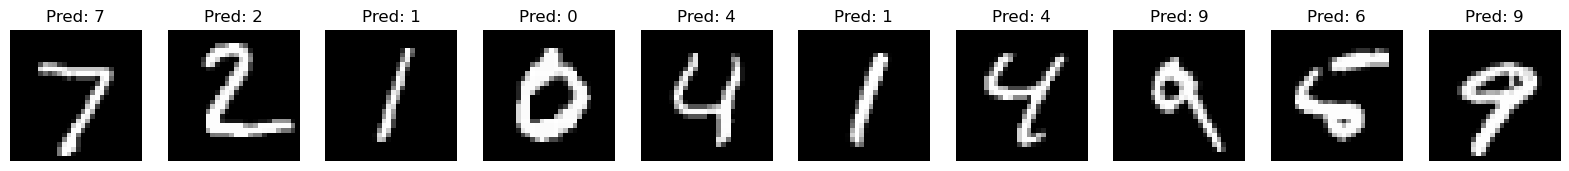

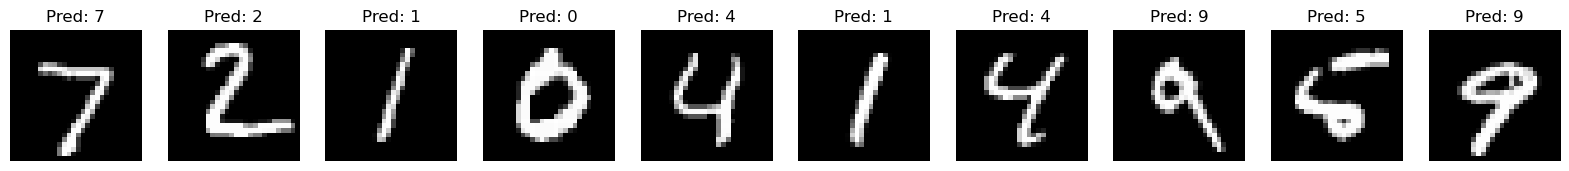

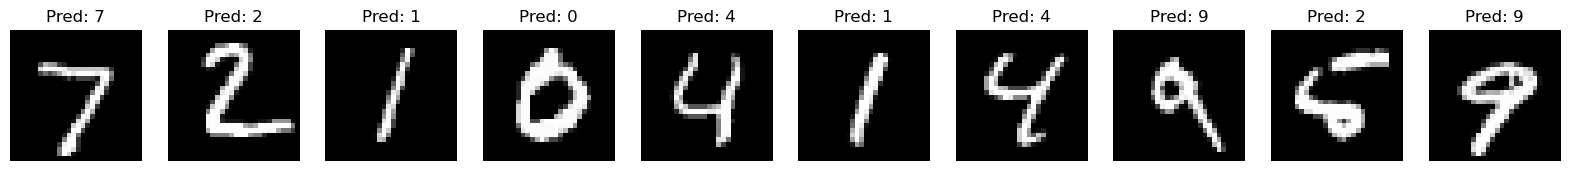

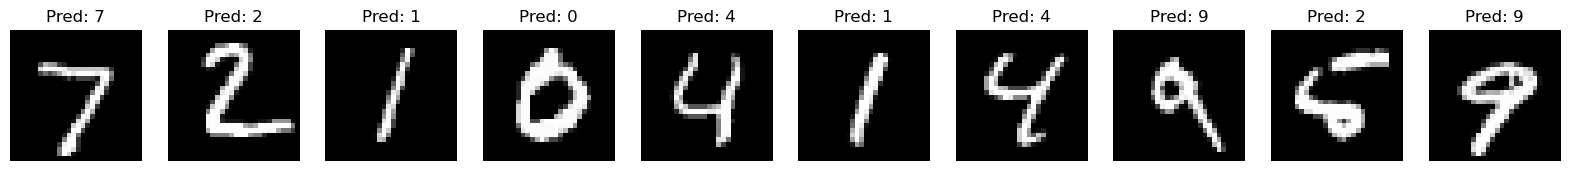

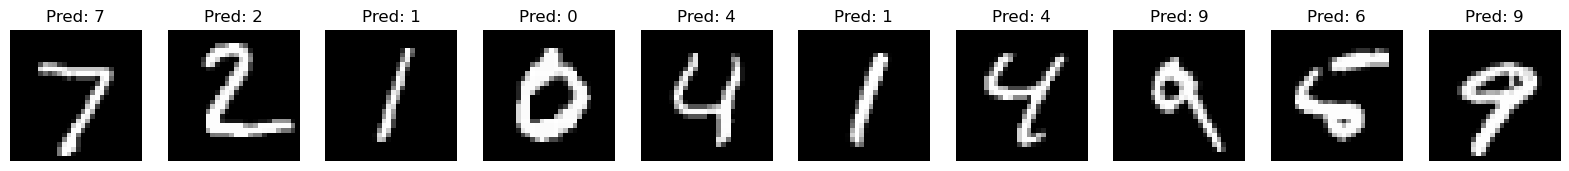

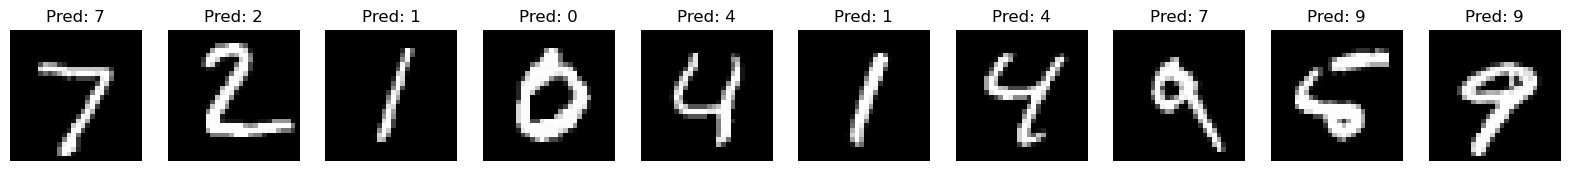

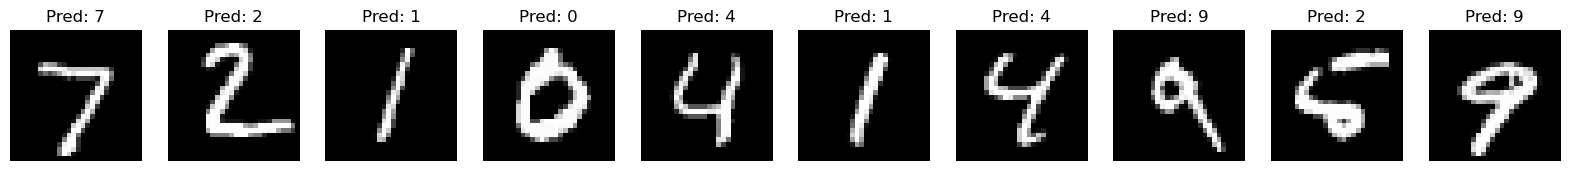

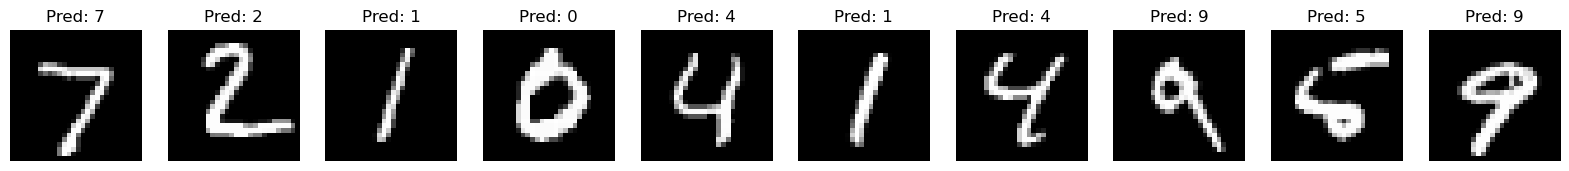

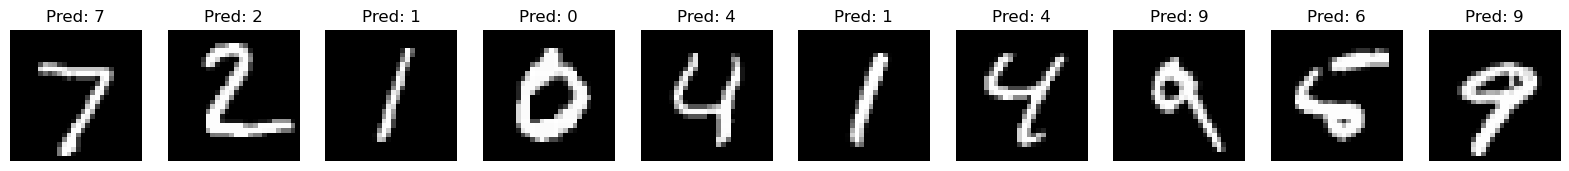

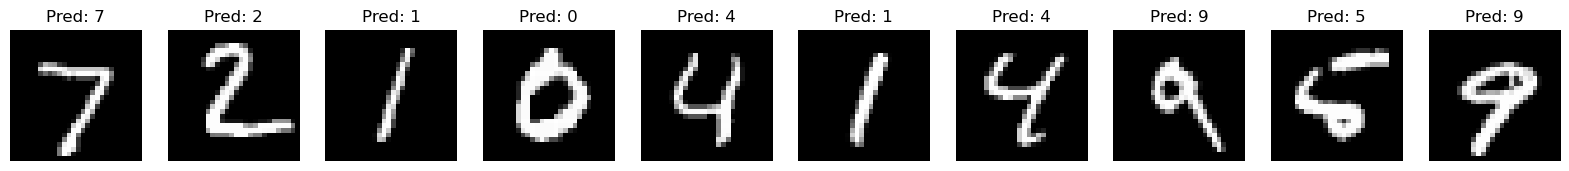

In [18]:
# Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project='mnist-classification')

# Define the training function
def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        
        # Select the optimizer based on the configuration
        if config.optimizer == 'adam':
            optimizer = Adam(learning_rate=config.learning_rate)
        elif config.optimizer == 'sgd':
            optimizer = SGD(learning_rate=config.learning_rate)
        elif config.optimizer == 'rmsprop':
            optimizer = RMSprop(learning_rate=config.learning_rate)
        
        # Build the model
        model = Sequential([
            Input(shape=(28, 28)),  # Input layer with the shape of the MNIST images
            Flatten(),  # Flatten the 28x28 images into 1D vectors
            Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
            Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
        ])

        # Compile the model with the selected optimizer, loss function, and evaluation metric
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        # Define callbacks for model checkpointing and logging to WandB
        callbacks = [
            WandbMetricsLogger(log_freq="epoch"),
        ]

        # Train the model
        history = model.fit(x_train, y_train, 
                            batch_size=config.batch_size,
                            epochs=config.epochs,
                            validation_data=(x_test, y_test),
                            callbacks=callbacks)

        # Log model architecture
        wandb.log({'model_architecture': model.to_json()})

        # Evaluate the model and log the results
        loss, accuracy = model.evaluate(x_test, y_test)
        wandb.log({'test_loss': loss, 'test_accuracy': accuracy})

        # Plot some predictions
        predictions = model.predict(x_test[:10])

        fig, axes = plt.subplots(1, 10, figsize=(20, 2))
        for i, ax in enumerate(axes):
            ax.set_axis_off()
            ax.imshow(x_test[i], cmap='gray')
            ax.set_title(f'Pred: {np.argmax(predictions[i])}')
        plt.savefig('predictions.png')
        wandb.log({"Predictions": wandb.Image('predictions.png')})


wandb.agent(sweep_id, function=train, count=10)


### More Resources

Here are some additional resources to help you learn more about using Weights and Biases (WandB) effectively:

1. **WandB Documentation**: Comprehensive guides and API references.
   - [WandB Documentation](https://docs.wandb.com)

2. **WandB Tutorials**: Step-by-step tutorials on various topics.
   - [WandB Tutorials](https://docs.wandb.com/library/tutorials)

3. **WandB Sweeps**: Learn how to perform hyperparameter tuning with Sweeps.
   - [WandB Sweeps Guide](https://docs.wandb.com/sweeps)

4. **WandB GitHub**: Explore the source code and contribute to the project.
   - [WandB GitHub](https://github.com/wandb/client)

5. **WandB Community**: Join the community for discussions, questions, and collaborations.
   - [WandB Community](https://community.wandb.ai)

6. **Blog Posts and Case Studies**: Read about real-world use cases and success stories.
   - [WandB Blog](https://www.wandb.com/articles)

Feel free to explore these resources to deepen your understanding and enhance your use of WandB in your projects.
